In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

For the US Data price prediction I have underfitting data, which can be caused due to small number of data. For that I will be exploring New Zealand's lego data, which has the highest amount of entries.

In [2]:
legoset = pd.read_csv('legoset.csv')

In [3]:
topthree_df = legoset[(legoset.country=='NZ') | (legoset.country=='PL') | (legoset.country=='PT') ]

In [4]:
#removing categoricaldata which will not be used for price prediction:

topthree_df = topthree_df.drop(columns=["ages",'prod_desc', 'prod_long_desc', 'set_name'], axis=1)

In [5]:
#getting dummies for categorical data to be used for price prediction

topthree_df = pd.get_dummies(topthree_df, columns=['theme_name', 'country' ], drop_first=False)

In [6]:
topthree_df.head()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,review_difficulty,star_rating,val_star_rating,min_age,max_age,...,theme_name_Pteranodon Chase,theme_name_Speed Champions,theme_name_Star Wars™,theme_name_Stygimoloch Breakout,theme_name_THE LEGO® BATMAN MOVIE,theme_name_THE LEGO® NINJAGO® MOVIE™,theme_name_Technic,country_NZ,country_PL,country_PT
8499,127.7929,23.0,1032.0,3.6,21030.0,3,4.6,4.3,12.0,99.0,...,0,0,0,0,0,0,0,1,0,0
8500,92.2929,14.0,744.0,3.2,21035.0,4,4.6,4.1,12.0,99.0,...,0,0,0,0,0,0,0,1,0,0
8501,70.9929,7.0,597.0,3.7,21039.0,3,4.9,4.4,12.0,99.0,...,0,0,0,0,0,0,0,1,0,0
8502,63.8929,24.0,780.0,4.4,21029.0,3,4.7,4.3,12.0,99.0,...,0,0,0,0,0,0,0,1,0,0
8503,63.8929,37.0,598.0,3.7,21028.0,3,4.2,4.1,12.0,99.0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
topthree_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 8499 to 9798
Data columns (total 49 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   list_price                                        1300 non-null   float64
 1   num_reviews                                       1300 non-null   float64
 2   piece_count                                       1300 non-null   float64
 3   play_star_rating                                  1300 non-null   float64
 4   prod_id                                           1300 non-null   float64
 5   review_difficulty                                 1300 non-null   int64  
 6   star_rating                                       1300 non-null   float64
 7   val_star_rating                                   1300 non-null   float64
 8   min_age                                           1300 non-null   float64
 9   max_age         

There are 1300 entires of data, compared to 671 entries of US data.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#splitting data to training and testing data sets:

X= topthree_df.drop(columns=['price_per_piece','prod_id', 'max_age', 'piece_count', 'list_price'], axis=1)

y = topthree_df['price_per_piece']

In [10]:
# test data contains 20%

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [11]:
print(len(X_train))
print(len(X_test))

1040
260


# Modelling

In [12]:
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score

In order to compare results, model selected is the same as for US data. First, Random Forest Regressor.

In [13]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

In [14]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf= rf.predict((X_test))

In [15]:
r2 = r2_score(y_test, y_pred_rf)
print(r2)

0.9375482782268874


In [16]:
# checking which features impact price prediction the most
rf.feature_importances_

array([2.04889936e-01, 9.88159133e-03, 2.01792851e-01, 1.49726526e-02,
       1.29774696e-01, 3.97416906e-02, 6.83845352e-02, 4.86284953e-06,
       4.46745317e-06, 1.13085216e-05, 5.88543410e-06, 2.90922085e-04,
       9.61324389e-06, 8.99141433e-05, 4.27417221e-05, 2.54156587e-05,
       4.39499375e-03, 6.30292802e-02, 2.70199981e-05, 3.00374395e-05,
       1.50909977e-05, 5.44153735e-05, 1.32077597e-06, 1.01736308e-05,
       6.14720652e-06, 1.09746665e-03, 1.44148806e-05, 4.53387270e-03,
       5.12783945e-05, 9.96537774e-05, 5.03699251e-03, 7.44254028e-06,
       1.39508121e-05, 2.40038259e-01, 1.02031681e-04, 2.01993541e-05,
       7.28296993e-04, 6.96458222e-05, 6.79511701e-05, 5.53500521e-05,
       6.21732254e-05, 6.64429910e-04, 1.84156200e-03, 8.00346468e-03])

Text(0.5, 1.0, 'Features Importance: Random Forest Regressor')

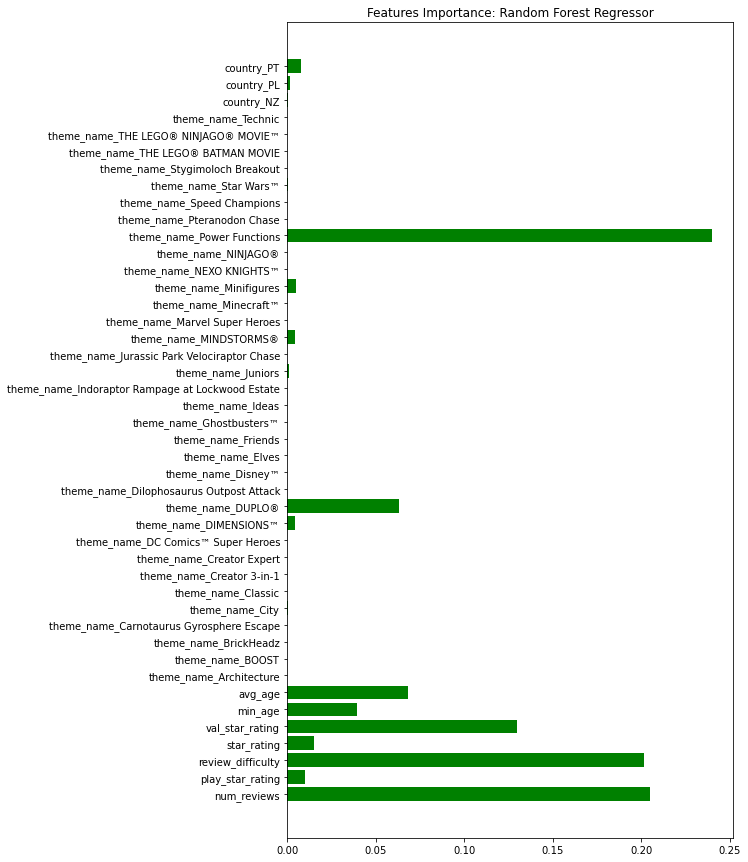

In [17]:
plt.figure(figsize=(8,15))

plt.barh(X_train.columns, rf.feature_importances_, color='green')
plt.title('Features Importance: Random Forest Regressor')

Text(0, 0.5, 'Predicted Values')

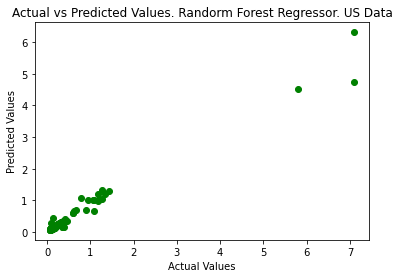

In [18]:
plt.scatter(y_test, y_pred_rf, color='green')
plt.title('Actual vs Predicted Values. Randorm Forest Regressor. US Data')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

The predicted and actual values much better displayed than in US only data. r2 score is 0.97 compared to US data score of 0.13.

/Users/baytech11/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Prediction Distribution')

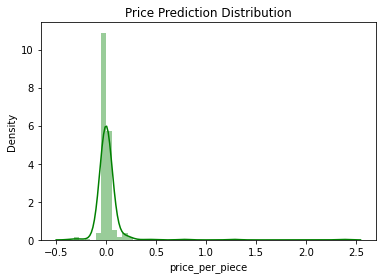

In [19]:
sns.distplot((y_test-y_pred_rf), bins=50, color='green');
plt.title('Price Prediction Distribution')